###  Measures of Risk

In [2]:
import pandas as pd
import numpy as np
prices = pd.read_csv('data/sample_prices.csv')

In [3]:
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [4]:
returns = prices.pct_change()

In [5]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [6]:
returns = returns.dropna()

In [7]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [8]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [9]:
deviations = returns - returns.mean()
dev_sq = deviations ** 2
var =  (dev_sq.mean())
sd = np.sqrt(var)
sd 

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [10]:
var = dev_sq.sum() / (returns.shape[0] - 1) ## Correction of Glocbal Population and Sample Population variances
volatility = np.sqrt(var)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [11]:
ann_vol = volatility * np.sqrt(12)
ann_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [12]:
returns = pd.read_csv('data\Portfolios_Formed_on_ME_monthly_EW.csv', header = 0, index_col = 0, parse_dates = True, na_values= -99.99)
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [13]:
columns = ['Lo 10', 'Hi 10']

In [14]:
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [15]:
returns = returns / 100

In [16]:
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [17]:
returns.columns = ['Small Cap', 'Large Cap']

In [18]:
returns.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


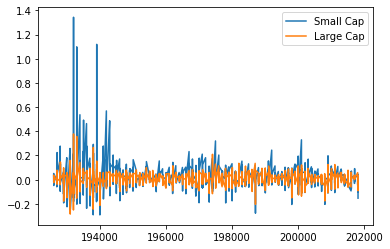

In [19]:
returns.plot()

In [20]:
returns.std()

Small Cap    0.106288
Large Cap    0.053900
dtype: float64

In [21]:
ann_vol = returns.std() * np.sqrt(12)

In [22]:
ann_vol

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

In [23]:
n_months = returns.shape[0]
return_per_month = ((returns + 1).prod()) ** (1/n_months) - 1
return_per_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

In [24]:
ann_vol

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

In [25]:
ann_return = (return_per_month + 1) ** 12 - 1
## or
ann_return = (returns + 1).prod() ** (12/n_months) - 1
ann_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

 $$ RoR = \frac{Return}{Risk} $$
 $$ Sharpe = \frac{R_{p} - R_{f}}{\sigma_{p}} $$

In [26]:
ror = ann_return / ann_vol
risk_free_rate = 0.03 
sharpe = (ann_return - risk_free_rate) / ann_vol

In [27]:
ror

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

In [28]:
sharpe

Small Cap    0.373346
Large Cap    0.336392
dtype: float64

In [29]:
returns_2 = pd.read_csv('data\Portfolios_Formed_on_ME_monthly_EW.csv', header = 0, index_col = 0, parse_dates = True, na_values= -99.99)
returns_2.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [30]:
n_months = returns_2.shape[0]
returns_2 = returns_2[['Lo 20', 'Hi 20']] / 100
returns_2.columns = ['Small Cap2', 'Large Cap2']
ann_vol2 = returns_2.std() * np.sqrt(12)
ann_vol2

Small Cap2    0.336701
Large Cap2    0.195116
dtype: float64

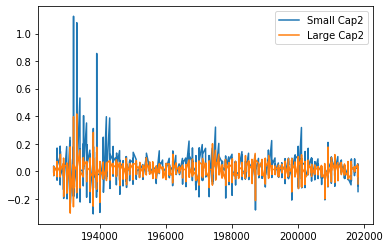

In [31]:
returns_2.plot()

In [32]:
ann_ret2 = (1 + returns_2).prod() ** (12/n_months) - 1
ann_ret2

Small Cap2    0.151977
Large Cap2    0.098490
dtype: float64

In [33]:
ror2 = ann_ret2 / ann_vol2
sharpe2 = (ann_ret2 - risk_free_rate) / ann_vol2

In [34]:
ror2

Small Cap2    0.451370
Large Cap2    0.504778
dtype: float64

In [35]:
sharpe2

Small Cap2    0.362271
Large Cap2    0.351023
dtype: float64